In [1]:
struct Circle
    r :: Float64
end

In [2]:
area(c::Circle) = c.r ^2 * π

area (generic function with 1 method)

In [3]:
struct Rectangle
    width :: Float64
    height :: Float64
end

In [4]:
area(r::Rectangle) = r.width * r.height;

In [5]:
shapes = [
      Rectangle(2,3)
    , Circle(2)
    , Rectangle(5,2)
    ];

In [6]:
area.(shapes)

3-element Vector{Float64}:
  6.0
 12.566370614359172
 10.0

In [7]:
f(x) = x^2 + x;

In [8]:
@code_native f(2)

	.section	__TEXT,__text,regular,pure_instructions
	.build_version macos, 14, 0
	.globl	_julia_f_957                    ; -- Begin function julia_f_957
	.p2align	2
_julia_f_957:                           ; @julia_f_957
; ┌ @ In[7]:1 within `f`
; %bb.0:                                ; %top
; │┌ @ int.jl:87 within `+`
	madd	x0, x0, x0, x0
; │└
	ret
; └
                                        ; -- End function
.subsections_via_symbols


In [9]:
@code_native f(2 + im)

	.section	__TEXT,__text,regular,pure_instructions
	.build_version macos, 14, 0
	.globl	_julia_f_988                    ; -- Begin function julia_f_988
	.p2align	2
_julia_f_988:                           ; @julia_f_988
; ┌ @ In[7]:1 within `f`
; %bb.0:                                ; %top
; │┌ @ intfuncs.jl:332 within `literal_pow`
; ││┌ @ complex.jl:296 within `*` @ int.jl:88
	ldp	x9, x10, [x0]
; │││ @ complex.jl:296 within `*`
; │││┌ @ int.jl:87 within `+`
	mul	x11, x10, x9
; │││└
; │││┌ @ int.jl:86 within `-`
	madd	x9, x9, x9, x9
; │└└└
; │┌ @ complex.jl:294 within `+` @ int.jl:87
	msub	x9, x10, x10, x9
	add	x10, x10, x11, lsl #1
; │└
	stp	x9, x10, [x8]
	ret
; └
                                        ; -- End function
.subsections_via_symbols


In [10]:
using DifferentialEquations, Plots

In [11]:
function simplependulum(𝑑u, u, p, t)
    g, L  = p
    θ, 𝑑θ = u
    𝑑u[1] = 𝑑θ
    𝑑u[2] = -g/L * sin(θ) - 0.1𝑑θ
end;

In [12]:
g₀  = 9.79       # Gravitational Constant
L₀  = 1.00       # Length of the pendulum
u₀  = [0, π/3];  # Initial angle of velocity

In [13]:
prob₀ = ODEProblem(simplependulum, u₀, (0,20), (g₀,L₀))
sol₀ = solve(prob₀);

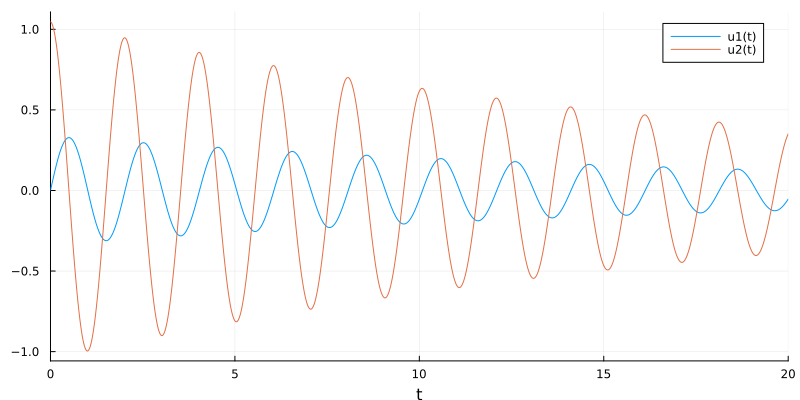

In [14]:
plot(sol₀, size = (800,400))

In [15]:
using MonteCarloMeasurements

In [16]:
g₁  = 9.79 ± 0.02      # Gravitational Constant
L₁  = 1.00 ± 0.02      # Length of the pendulum
û₀ = [0, π/3 ± 0.02]; # Initial angle of velocity

In [17]:
prob₁ = ODEProblem(simplependulum, û₀, (0,20), (g₁,L₁))
sol₁ = solve(prob₁);

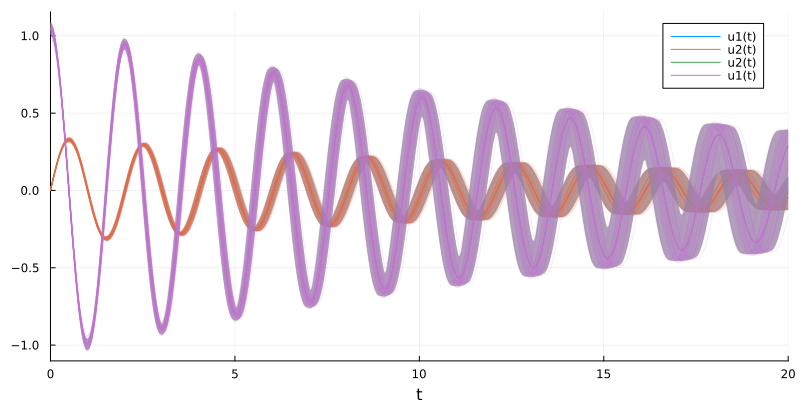

In [18]:
plot(sol₁, size = (800,400))

# &#x1F4DA; References
- [ ] [Julia for AI and Data Science by Kristoffer Carlsson and Fredrik Bagge Carlson](https://www.youtube.com/watch?v=2MBD10lqWp8)